# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-04-09 07:33:28--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.008s  

2023-04-09 07:33:28 (7.15 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import random
import seaborn as sns
import matplotlib.pyplot as plt



random.seed(0)
np.random.seed(0)

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)


In [ ]:
pd.DataFrame(data)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,703,93,43,78,162,64,8,137,48,18,145,156,281,159,63,17,12,203,210
1,155,110,56,103,223,64,5,250,26,27,169,280,928,239,85,4,6,184,183
2,843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
3,671,103,41,83,194,63,9,175,38,21,142,199,455,138,65,7,30,197,206
4,443,99,50,88,204,64,10,185,35,22,159,209,517,193,66,12,11,194,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,835,111,58,105,183,51,6,265,26,29,174,285,1018,255,85,4,8,181,183
545,192,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194
546,629,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204
547,559,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,432.114754,93.839709,44.765027,81.872495,169.358834,61.817851,8.433515,168.934426,40.865209,20.588342,147.571949,188.744991,440.672131,174.539162,72.449909,6.557377,12.568306,189.030965,195.491803
std,240.666501,8.335779,6.190806,15.647408,32.834864,7.971412,4.491440,33.163102,7.790602,2.588917,14.451808,31.241299,176.701194,32.845869,7.308114,5.006099,9.010809,6.200788,7.435024
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,177.000000,181.000000
25%,225.000000,87.000000,40.000000,70.000000,142.000000,57.000000,6.000000,147.000000,34.000000,19.000000,136.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,431.000000,93.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,644.000000,100.000000,49.000000,96.000000,195.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,216.000000,575.000000,198.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,186.000000,287.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: >]], dtype=object)

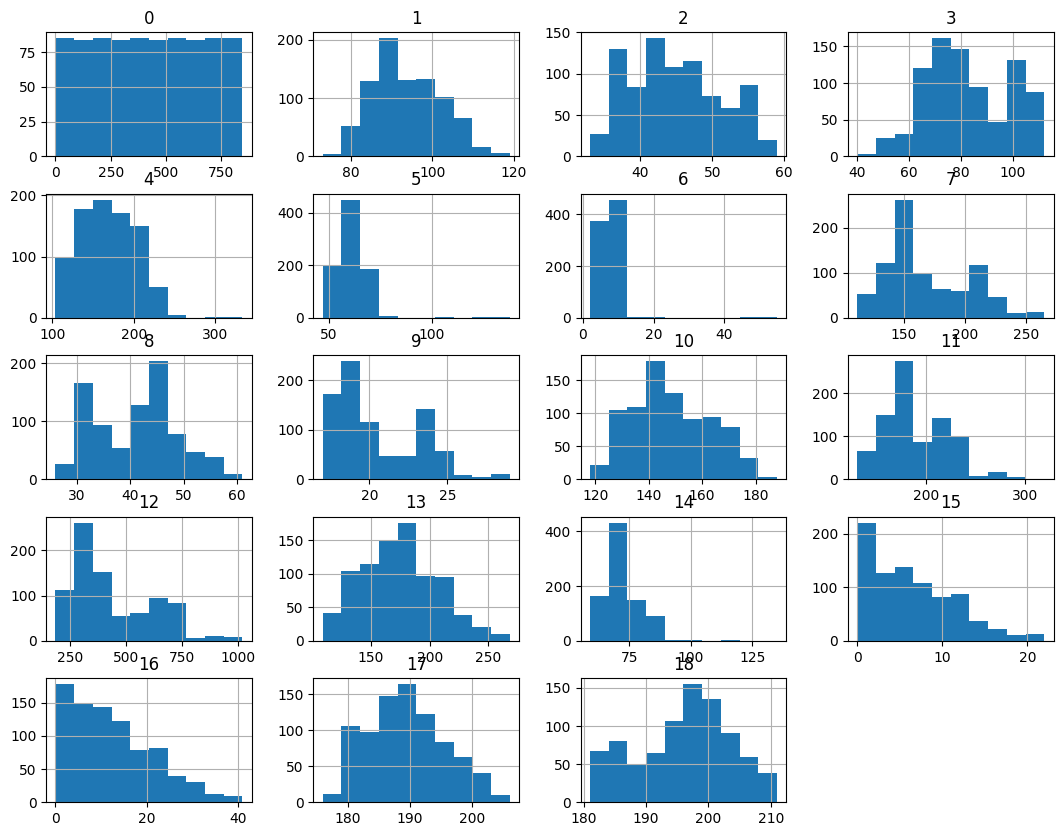

In [ ]:
pd.DataFrame(data).hist(figsize=(13,10))

Столбец  признаком '0'. Вызыает вопросы. Посмотрим на него повнимательней: 



In [3]:
df = pd.DataFrame(data)
#оказалось, что первый столбец дублирует индексы датафрейма. удалим его
df.drop(columns=0, inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [4]:
#построим матрицу корелляций признаков
#номера колонок начинаются с 1. номера индексов начинаются с 0.
#создадим в цикле массив-сдвига shift, который сдвинет индексы колонок с высокой корреляцией на единичку вправо, 
#чтобы они соответствовали номерам колонок для удобства восприятия

corr = df.corr()
dep_feat = corr.apply(lambda x: x > 0.9)
for col in corr.columns:                                                             
  shift = np.ones_like(np.where(dep_feat[col])[0])                                                                                                                       
  print(f'Column №{col}; corresponding list{np.where(dep_feat[col])[0] + shift }')   


Column №1; corresponding list[1]
Column №2; corresponding list[ 2 10 13]
Column №3; corresponding list[3 7]
Column №4; corresponding list[4]
Column №5; corresponding list[5]
Column №6; corresponding list[6]
Column №7; corresponding list[ 3  7  9 11 12]
Column №8; corresponding list[8]
Column №9; corresponding list[ 7  9 11 12]
Column №10; corresponding list[ 2 10]
Column №11; corresponding list[ 7  9 11 12]
Column №12; corresponding list[ 7  9 11 12]
Column №13; corresponding list[ 2 13]
Column №14; corresponding list[14]
Column №15; corresponding list[15]
Column №16; corresponding list[16]
Column №17; corresponding list[17]
Column №18; corresponding list[18]


На основе полученных данных можем сдедать вывод, что признаки под номерами 6,8,9,10, 11, 12 могут быть удалены из датафрейма

In [5]:
df_independ = df.drop(columns=[6,8,9,10,11,12])
targ = pd.DataFrame(target)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_independ, targ, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 12) (549, 1) (297, 12) (297, 1)


In [7]:
! pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import scikitplot
import warnings
from sklearn.ensemble import BaggingClassifier
from tqdm import tqdm


warnings.filterwarnings('ignore')


In [9]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [63]:
#теперь попробуем осуществить поиск гиперпараметров
# создадим словарь с параметрами, которые хотим установить и перебрать
parameters = {
    'C': [1, 10,50, 100, 150, 200, 250,300, 350,400, 450, 500]
}

lr_grid = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga',tol=0.001)
# подаем на вход модель, словарь с параметрами, установим, на какую метрику ориентироваться
clf_tuned = GridSearchCV(estimator=lr_grid,
                   param_grid=parameters,
                   scoring='accuracy',
                   cv = 5)
clf_tuned.fit(X_train_std, y_train)

# получение вероятностей

y_pred_grid = clf_tuned.best_estimator_.predict(X_test_std)
y_pred_score = clf_tuned.predict_proba(X_test_std)
f1_lg = f1_score(y_test, y_pred_grid, average='micro')

print(f'Accuracy score:{round(accuracy_score(y_test, y_pred_grid),3)}')
print(f'F1-score:{round(f1_lg,3)}')


Accuracy score:0.791
F1-score:0.791


In [12]:
clf_tuned.best_params_

{'C': 300}

In [13]:
print(classification_report(y_test, y_pred_grid))


              precision    recall  f1-score   support

         bus       0.93      0.93      0.93        73
        opel       0.63      0.70      0.67        74
        saab       0.70      0.62      0.66        84
         van       0.93      0.95      0.94        66

    accuracy                           0.79       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.79      0.79      0.79       297



 Логистическая регрессия в целом даёт хорошую точность предсказаний - 79%. 
 
 Также стоит заметить, что точность предсказания классов(по всем метрикам) 'bus' и 'van' получилиась на 20-30% больше, чем у 'opel' и 'sab'.

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

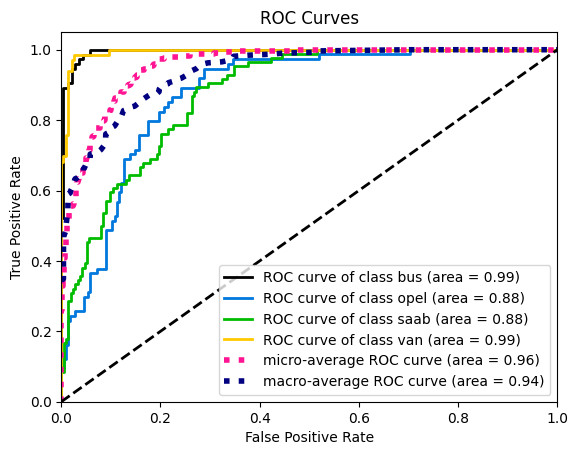

In [14]:
scikitplot.metrics.plot_roc(y_test, y_pred_score)

Площадь под Roc-кривой близка к единица, следовательно удалось получить Логрегрессия с настроенными гиперпараметром С=300 - хороший класссификатор.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

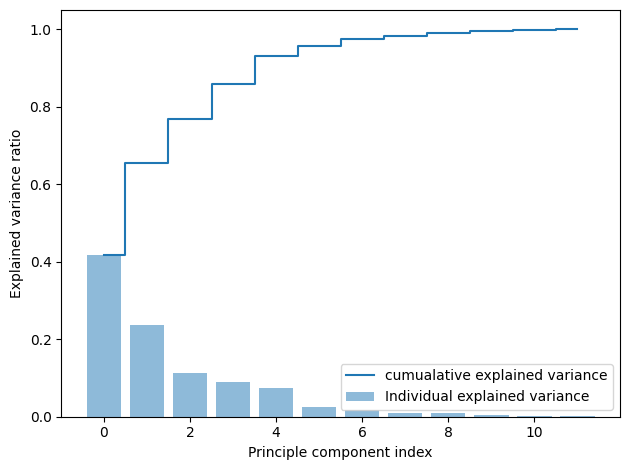

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#инициализация PCA 
pca = PCA()

#трансформаируем матрицу признаков
X_train_pca = pca.fit_transform(X_train_std)

#determine explained_variance_ration_ attribute 
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

#создадим барчарт, оторбражающий долю вариативности, вносимую каждым из признаков
#ступеначатая линия сверху представляет куммулятивную сумму вариативности признаков

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', 
        label ='Individual explained variance')
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues,
         where = 'mid', label = 'cumualative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:

exp_var_pca[:10].sum()


0.9956577602214433

По полученному барчарту и значению переменной "exp_var_pca" мы можем оценить вариабельность признаков нашего датасета. Также мы посчитали сумму первых семи элементов exp_var_pca и получили значение ~100%. 

То есть первые семь признаков из "exp_var_pca" , расположенных по убыванию вариативности, обеспечивают до 100% вариативности в наших данных. Поэтому размерность можно спокойно понизить с 12 до 10


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [24]:
X = sc.fit_transform(df_independ)

pca_7 = PCA(n_components = 10)
X_pca = pca_7.fit_transform(X)

print(X_pca.shape)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, targ, test_size=0.35)
print(X_train_pca.shape, y_train_pca.shape, X_test_pca.shape, y_test_pca.shape)

(846, 10)
(549, 10) (549, 1) (297, 10) (297, 1)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [61]:

clf_pca = LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga',tol=0.001)
# подаем на вход модель, словарь с параметрами, установим, на какую метрику ориентироваться
clf_tuned_pca = GridSearchCV(estimator=clf_pca,
                   param_grid=parameters,
                   scoring='accuracy',
                   cv = 5)
clf_tuned_pca.fit(X_train_pca, y_train_pca)


print(f"Точность обучения на тренировочной выборке при подброре гиперпараметра составила:\
      {round(clf_tuned_pca.best_score_, 3)}")
print(f'Значения гиперпараметра{clf_tuned_pca.best_params_}')

y_pred_pca = clf_tuned_pca.best_estimator_.predict(X_test_pca)
y_prob_pca = clf_tuned_pca.predict_proba(X_test_pca)

print(f'Точность обучения на тестовой выборке:{round(accuracy_score(y_test_pca, y_pred_pca),3)}')
f1_lg_pca = f1_score(y_test_pca, y_pred_pca, average='micro')
print(f'F1-мера на тестовой выборке:{round(f1_lg_pca,3)}')
print('\n')
print(classification_report(y_test_pca, y_pred_pca))



Точность обучения на тренировочной выборке при подброре гиперпараметра составила:      0.738
Значения гиперпараметра{'C': 100}
Точность обучения на тестовой выборке:0.694
F1-мера на тестовой выборке:0.694


              precision    recall  f1-score   support

         bus       0.87      0.81      0.84        77
        opel       0.53      0.53      0.53        75
        saab       0.60      0.59      0.59        83
         van       0.80      0.89      0.84        62

    accuracy                           0.69       297
   macro avg       0.70      0.70      0.70       297
weighted avg       0.69      0.69      0.69       297



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

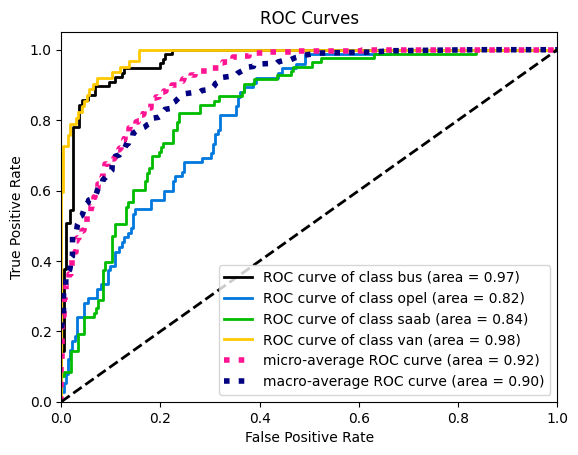

In [37]:
scikitplot.metrics.plot_roc(y_test_pca, y_prob_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [62]:
from sklearn.tree import DecisionTreeClassifier

params_grid = {'max_depth':[i for i in range(2, 20)]}

gs = GridSearchCV(DecisionTreeClassifier(), params_grid, cv=5)

gs.fit(X_train_std, y_train)

gs.best_params_

#y_pred_dt = gs.best_estimator_.predict(X_test)



{'max_depth': 4}

In [59]:

y_pred_dt = gs.best_estimator_.predict(X_test_std)
f1_dec = f1_score(y_test, y_pred_dt, average='micro')
print(f'Accuracy score:{round(accuracy_score(y_test, y_pred_dt),3)}')
print(f'F1-score:{round(f1_dec,3)}')
print("\n")
print('Classification report:')
print(classification_report(y_test, y_pred_dt))

Accuracy score:0.663
F1-score:0.663


Classification report:
              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        73
        opel       0.52      0.38      0.44        74
        saab       0.55      0.55      0.55        84
         van       0.77      0.89      0.83        66

    accuracy                           0.66       297
   macro avg       0.65      0.67      0.66       297
weighted avg       0.65      0.66      0.65       297



#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [45]:
from sklearn.utils.optimize import ConvergenceWarning
N_max = 100
N_min = 2
step = 5
N_values = np.arange(N_min, N_max, step)
N_values = np.append(N_values, N_max) #добавили отдельно значение N=100 в список

lr_acc_scores = []
lr_f1_scores = []

tree_acc_scores= []
tree_f1_scores = []

lr_classifier = BaggingClassifier(LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=300), 
                                  n_estimators = N_max)
tree_classifier = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=4),
                                    n_estimators = N_max)

lr_classifier.fit(X_train, y_train)
tree_classifier.fit(X_train, y_train)

lr_estimators = lr_classifier.estimators_
tree_estimators = tree_classifier.estimators_

for n in N_values:
  lr_proba = lr_estimators[0].predict_proba(X_test)
  tree_proba = tree_estimators[0].predict_proba(X_test)
  for i in range(1,n):
    lr_proba += lr_estimators[i].predict_proba(X_test)
    tree_proba += tree_estimators[i].predict_proba(X_test)
  lr_proba = lr_proba / float(n)
  tree_proba = tree_proba/ float(n)
  lr_pred = lr_classifier.classes_[np.argmax(lr_proba, axis=1)]
  tree_pred = tree_classifier.classes_[np.argmax(tree_proba, axis=1)]

  lr_acc_scores.append(accuracy_score(y_test, lr_pred))
  lr_f1_scores.append(f1_score(y_test, lr_pred, average='micro'))

  tree_acc_scores.append(accuracy_score(y_test, tree_pred))
  tree_f1_scores.append(f1_score(y_test, tree_pred, average='micro'))


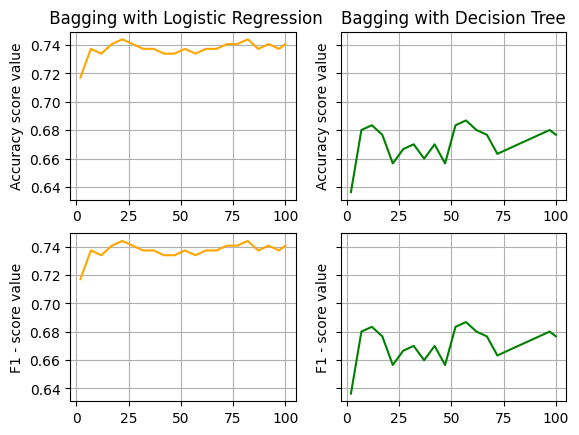

<Figure size 800x1400 with 0 Axes>

In [46]:
fig, axis = plt.subplots(2,2, sharey=True)
plt.figure(figsize=((8,14)))

axis[0,0].plot(N_values, lr_acc_scores,color='orange')
axis[0,0].set_ylabel('Accuracy score value')
axis[0,0].set_title(' Bagging with Logistic Regression')
axis[0,0].grid()

axis[1,0].plot(N_values, lr_acc_scores,color='orange')
axis[1,0].set_ylabel('F1 - score value')
axis[1,0].grid()

axis[0,1].plot(N_values, tree_acc_scores,color='green')
axis[0,1].set_ylabel('Accuracy score value')
axis[0,1].set_title('Bagging with Decision Tree')
axis[0,1].grid()

axis[1,1].plot(N_values, tree_acc_scores,color='green')
axis[1,1].set_ylabel('F1 - score value')
axis[1,1].grid()




plt.show()

In [57]:

a = max(lr_acc_scores)
b = max(tree_acc_scores)

print(f'Максимальная точность для лог. регрессии: {round(a, 2)}, индекс элемента в массиве: {lr_acc_scores.index(a)}')
print(f'Оптимальное число ансамблей для лог. регрессии: {N_values[4]}')
print('\n')
print(f'Максимальная точность для решающих деревьев: {round(b, 2)}, индекс элемента в массиве: {tree_acc_scores.index(b)}')
print(f'Оптимальное число ансамблей для решающих деревьев: {N_values[11]}')


Максимальная точность для лог. регрессии: 0.74, индекс элемента в массиве: 4
Оптимальное число ансамблей для лог. регрессии: 22


Максимальная точность для решающих деревьев: 0.69, индекс элемента в массиве: 11
Оптимальное число ансамблей для решающих деревьев: 57


**По полученным данным можно сделать следующие выводы:**


*   Ансамбль из лог. регрессий показал лучший результат, чем ансамбль из решающих деревьев;
*   Максимальная точность у ансамбля из лог. регрессий наблюдалась при N=22. Далее с ростом N колебалаась около значения 0.74;

*   У ансамбля из решающих деревьев наблюдалось скачкообразное измнение точности. Максимум при N = 57;
*   Графики accuracy и f1-меры практически не отличаются друг от друга для одного и того же ансамбля;

*   Анасамбль из решающих деревье показал лучшую точность по сравнению с одним решающим деревом(0.69 > 0.66), поэтому нет смысла подбирать другие гиперпараметры для ансамбля деревьев;
*   Ансамбль из лог. регрессий показал результат хуже, чем обычная лог. регрессия(0.74 < 0.79 )




 


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [67]:
from sklearn.ensemble import RandomForestClassifier

#попробуем подобрать оптимальное число деревьев для алгоритма случайный лес
grid_par_rf = {'n_estimators': [i for i in range(1,110)]}

rf_opt = GridSearchCV(RandomForestClassifier(), grid_par_rf, cv=5, scoring='accuracy')
rf_opt.fit(X_train, y_train)

rf_opt.best_params_, rf_opt.best_score_


({'n_estimators': 78}, 0.7669891576313594)

In [68]:
#не получили ощутимого прироста по точности

y_pred_rf_opt = rf_opt.best_estimator_.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf_opt, average='micro')
acc_rf = accuracy_score(y_test, y_pred_rf_opt)

print(f'Accuracy score:{round(acc_rf,3)}')
print(f'F1-score:{round(f1_rf,3)}')


Accuracy score:0.7
F1-score:0.7


Построим график зависимости метрик accuracy и f1-score в зависимости от кол-ва деревьев 

In [69]:
num_trees_list = np.linspace(1,100).astype(int)
acc_score_list, f1_score_list= [], []

for n_estim in tqdm(num_trees_list):
  model = RandomForestClassifier(n_estimators=n_estim)
  model.fit(X_train, y_train)
  result = model.predict(X_test)
  acc_score_list.append(accuracy_score(y_test, result))
  f1_score_list.append(f1_score(y_test, result, average='micro'))

# print(f'f1-score w.r.t. n_estimators:{f1_score_list}')

# print(f'accuracy-score w.r.t. n_estimators:{acc_score_list}')


100%|██████████| 50/50 [00:07<00:00,  7.09it/s]


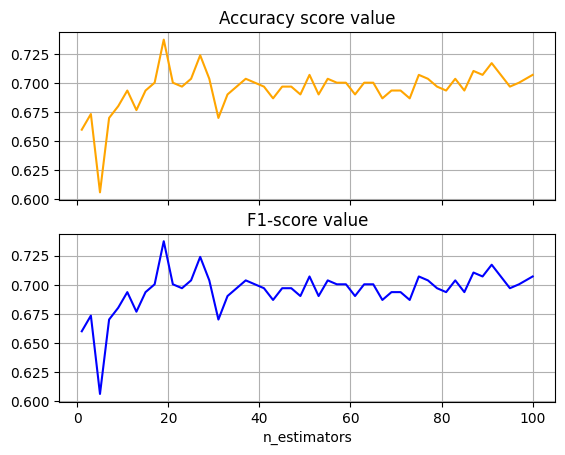

In [70]:
acc_array = np.array(acc_score_list)
f1_array = np.array(f1_score_list)


fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(num_trees_list, acc_array,color='orange', label='accuracy score')
ax1.set_title('Accuracy score value')
ax1.grid()


ax2.plot(num_trees_list, f1_array, color='blue',label='f1-score')
ax2.set_title('F1-score value')
ax2.set(xlabel='n_estimators')
ax2.grid()

plt.show()


При использовании случайного леса получили прирост точности в 1% по сравнению с бэггингом над решающими деревьями( 0.7 > 0.69). Этого стоило ожидать, поскольку random forest - это расширение над bagging, которое случайным образом выбирает подмножество фичей, используемых в каждой выборке данных. Поскольку меняются фичи, то меняется и структура дерева. В этом случае у нас по сути ансамбль разных деревьев. 

Вышесказанным также можно объяснить тот факт, что мы получили другое число оптимальных деревьев, чем в бэггинге. 

**При бэггинге:**  *N_opt* = 57;

**При Random Forest:**  *N_opt* = 78


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [77]:
# YOUR CODE HERE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

LG_ACC_SCORE = []
DT_ACC_SCORE = []
RF_ACC_SCORE = []

LG_F1_SCORE = []
DT_F1_SCORE = []
RF_F1_SCORE = []

train_size = []

X_parts = np.array_split(pd.DataFrame(X_train_std),10, axis=0 )
y_parts = np.array_split(y_train, 10, axis=0)

LG_pipe = make_pipeline(StandardScaler(), LogisticRegression(C = 300, max_iter=500, multi_class='multinomial', solver='saga',tol=0.001))
DT_pipe= DecisionTreeClassifier(max_depth = 4)
RF_pipe = RandomForestClassifier(n_estimators= 78)


In [78]:
#function for cumulative concatination of dataframes

def cum_concat(n, part_data):
  
  first_two = pd.concat([part_data[0], part_data[1]])

  if n == 0:
    return part_data[0]
  elif n == 1:
    return first_two 
  else:
    for i in range(1,n):
      conc = pd.concat([first_two, part_data[i+1]])
      first_two = conc
    return conc

#first train Logistic Regression
for i in tqdm(range(10)):
  x_tr = cum_concat(i, X_parts)
  y_tr = cum_concat(i, y_parts)
  LG_pipe.fit(x_tr, y_tr )
  y_pr = LG_pipe.predict(X_test_std)
  LG_ACC_SCORE.append(accuracy_score(y_test, y_pr) )
  LG_F1_SCORE.append(f1_score(y_test, y_pr, average='micro') )
  train_size.append(x_tr.shape[0])



100%|██████████| 10/10 [00:00<00:00, 11.86it/s]


In [79]:
#now train Decision Tree
for i in tqdm(range(10)):
  x_tr = cum_concat(i, X_parts)
  y_tr = cum_concat(i, y_parts)
  DT_pipe.fit(x_tr, y_tr )
  y_pr = DT_pipe.predict(X_test_std)
  DT_ACC_SCORE.append(accuracy_score(y_test, y_pr) )
  DT_F1_SCORE.append(f1_score(y_test, y_pr, average='micro') )


100%|██████████| 10/10 [00:00<00:00, 58.70it/s]


In [80]:
#finally train Random Forest
for i in tqdm(range(10)):
  x_tr = cum_concat(i, X_parts)
  y_tr = cum_concat(i, y_parts)
  RF_pipe.fit(x_tr, y_tr )
  y_pr = RF_pipe.predict(X_test_std)
  RF_ACC_SCORE.append(accuracy_score(y_test, y_pr) )
  RF_F1_SCORE.append(f1_score(y_test, y_pr, average='micro') )


100%|██████████| 10/10 [00:03<00:00,  3.23it/s]


Now let's visualise our accuracy and f1 plots in dependance of X_train size:

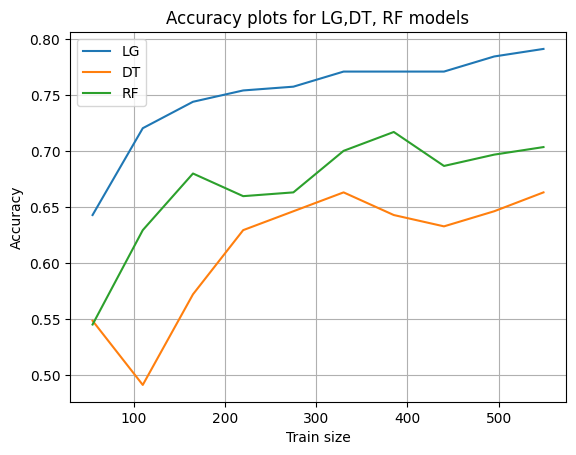

In [81]:
plt.plot(train_size, LG_ACC_SCORE, label='LG')
plt.plot(train_size, DT_ACC_SCORE, label='DT')
plt.plot(train_size, RF_ACC_SCORE, label='RF')
plt.legend()
plt.title("Accuracy plots for LG,DT, RF models")
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.grid()


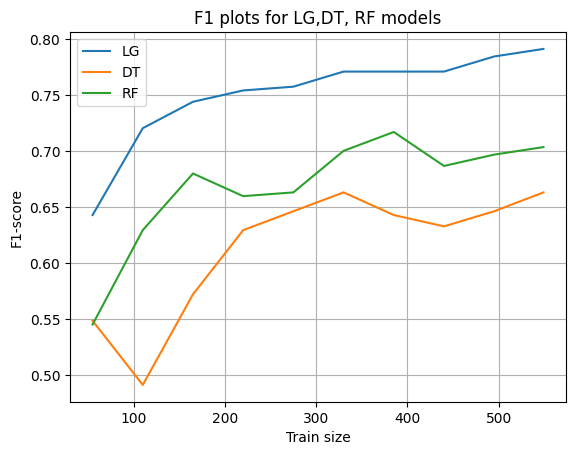

In [82]:
plt.plot(train_size, LG_F1_SCORE, label='LG')
plt.plot(train_size, DT_F1_SCORE, label='DT')
plt.plot(train_size, RF_F1_SCORE, label='RF')
plt.legend()
plt.title("F1 plots for LG,DT, RF models")
plt.xlabel('Train size')
plt.ylabel('F1-score')
plt.grid()


# Вывод:


1.   В целом наблюдается рост точности/f1-меры с уваличением размера тренировочной выборки для LogRegr и RandomForest. У Decision Tree вначале рост, затем небольшие скачки после train_size>=320 

2.   Наилучшую точность показала логистическая регрессия, второе место занял слачайный лес, треье - решающее дерево. 


